c:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


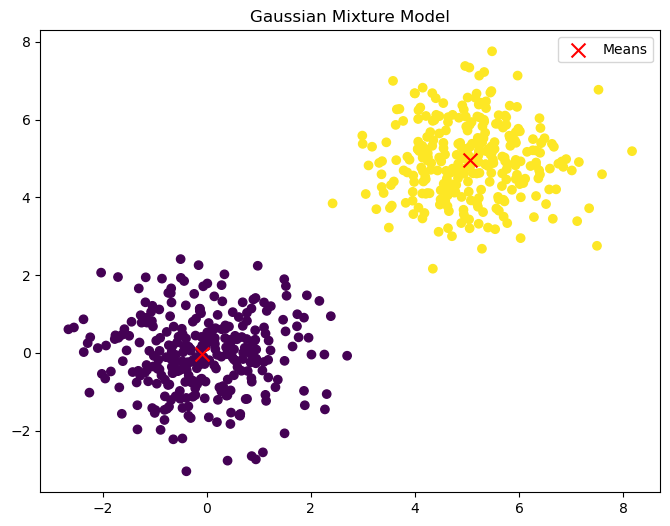

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture

# 랜덤 데이터 생성
np.random.seed(0)
n_samples = 300
X = np.concatenate([1.0 * np.random.randn(n_samples, 2),
                    5 + 1.0 * np.random.randn(n_samples, 2)])

# GMM 모델 생성 및 학습
n_components = 2  # GMM의 구성 요소 수
gmm = GaussianMixture(n_components=n_components)
gmm.fit(X)

# 각 데이터 포인트가 속한 클러스터 확인
labels = gmm.predict(X)

# GMM의 평균 및 공분산 확인
means = gmm.means_
covariances = gmm.covariances_

# 시각화
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.scatter(means[:, 0], means[:, 1], color='red', marker='x', s=100, label='Means')
plt.title('Gaussian Mixture Model')
plt.legend()
plt.show()


In [2]:
import numpy as np
from scipy.stats import multivariate_normal

class GMM:
    def __init__(self, n_components, max_iter=100, tol=1e-4):
        self.n_components = n_components
        self.max_iter = max_iter
        self.tol = tol

    def fit(self, X):
        self.X = X
        self.n_samples, self.n_features = X.shape

        # Initialize parameters
        self.weights = np.full(self.n_components, 1 / self.n_components)
        self.means = X[np.random.choice(self.n_samples, self.n_components, replace=False)]
        self.covariances = np.array([np.cov(X.T) for _ in range(self.n_components)])

        log_likelihood = 0
        self.converged = False

        for i in range(self.max_iter):
            # E-step: Expectation
            responsibilities = self._expectation_step()

            # M-step: Maximization
            self._maximization_step(responsibilities)

            # Calculate log likelihood to check for convergence
            new_log_likelihood = self._calculate_log_likelihood()
            if np.abs(new_log_likelihood - log_likelihood) < self.tol:
                self.converged = True
                break

            log_likelihood = new_log_likelihood

    def _expectation_step(self):
        responsibilities = np.zeros((self.n_samples, self.n_components))
        for i in range(self.n_components):
            # Calculate PDF of each sample for each component
            component_pdf = multivariate_normal.pdf(self.X, self.means[i], self.covariances[i])
            responsibilities[:, i] = self.weights[i] * component_pdf

        # Normalize responsibilities
        responsibilities = responsibilities / responsibilities.sum(axis=1)[:, np.newaxis]
        return responsibilities

    def _maximization_step(self, responsibilities):
        for i in range(self.n_components):
            # Update weights
            total_responsibility = np.sum(responsibilities[:, i])
            self.weights[i] = total_responsibility / self.n_samples

            # Update means
            self.means[i] = np.sum(self.X * responsibilities[:, i][:, np.newaxis], axis=0) / total_responsibility

            # Update covariances
            self.covariances[i] = np.dot((responsibilities[:, i][:, np.newaxis] * (self.X - self.means[i])).T,
                                         (self.X - self.means[i])) / total_responsibility

    def _calculate_log_likelihood(self):
        log_likelihood = 0
        for i in range(self.n_components):
            component_pdf = multivariate_normal.pdf(self.X, self.means[i], self.covariances[i])
            log_likelihood += self.weights[i] * component_pdf
        return np.sum(np.log(log_likelihood))

    def predict(self, X):
        responsibilities = np.zeros((X.shape[0], self.n_components))
        for i in range(self.n_components):
            component_pdf = multivariate_normal.pdf(X, self.means[i], self.covariances[i])
            responsibilities[:, i] = self.weights[i] * component_pdf

        return np.argmax(responsibilities, axis=1)


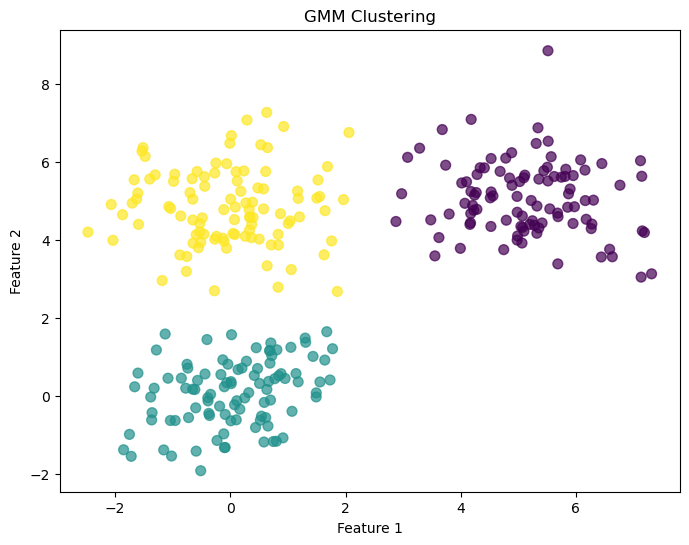

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# GMM class definition (same as provided earlier)

# Generating synthetic data
np.random.seed(42)
mean1 = [0, 0]
cov1 = [[1, 0.5], [0.5, 1]]
mean2 = [5, 5]
cov2 = [[1, 0], [0, 1]]
mean3 = [0, 5]
cov3 = [[1, 0], [0, 1]]

data1 = np.random.multivariate_normal(mean1, cov1, 100)
data2 = np.random.multivariate_normal(mean2, cov2, 100)
data3 = np.random.multivariate_normal(mean3, cov3, 100)

X = np.vstack([data1, data2, data3])

# Fit the GMM model
gmm = GMM(n_components=3)  # Example: using 3 clusters
gmm.fit(X)

# Make predictions
predicted_labels = gmm.predict(X)

# Plotting the clustered data
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=predicted_labels, cmap='viridis', s=50, alpha=0.7)
plt.title('GMM Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()
